In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

2024-10-11 00:22:38.062825: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-11 00:22:38.062936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-11 00:22:38.190969: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
meta_data=pd.read_csv('drive/skin-cancer/Skin.csv')
meta_data

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
unique_counts = meta_data.nunique()

print("\nUnique entries in each column:")
print(unique_counts)


Unique entries in each column:
lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                18
sex                 3
localization       15
dtype: int64


In [ ]:
meta_data['sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

In [ ]:
meta_data['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

In [ ]:
meta_data.describe(include='all')

lesion_id      image_id     dx dx_type          age    sex  \
count         10015         10015  10015   10015  9958.000000  10015   
unique         7470         10015      7       4          NaN      3   
top     HAM_0003789  ISIC_0032258     nv   histo          NaN   male   
freq              6             1   6705    5340          NaN   5406   
mean            NaN           NaN    NaN     NaN    51.863828    NaN   
std             NaN           NaN    NaN     NaN    16.968614    NaN   
min             NaN           NaN    NaN     NaN     0.000000    NaN   
25%             NaN           NaN    NaN     NaN    40.000000    NaN   
50%             NaN           NaN    NaN     NaN    50.000000    NaN   
75%             NaN           NaN    NaN     NaN    65.000000    NaN   
max             NaN           NaN    NaN     NaN    85.000000    NaN   

       localization  
count         10015  
unique           15  
top            back  
freq           2192  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

In [ ]:
print(meta_data.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


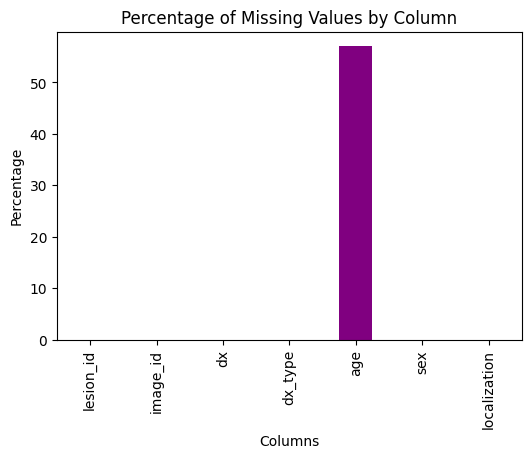

In [ ]:
missing_values = meta_data.isnull().sum()
print(missing_values)
missing_values_percentage = (missing_values)
plt.figure(figsize=(6, 4))
missing_values_percentage.plot(kind='bar', color='purple')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()

In [ ]:
categorical_columns = ['lesion_id', 'image_id', 'dx', 'dx_type', 'sex', 'localization']
numerical_columns = ['age']

In [ ]:
for column in categorical_columns:
    meta_data['localization'].value_counts()

meta_data['localization'].value_counts()

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64

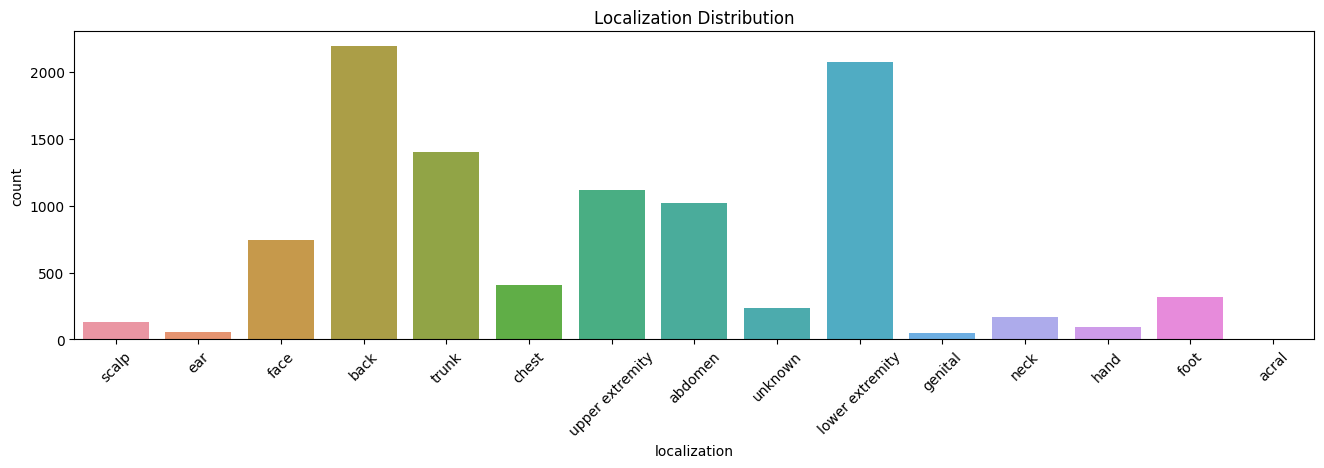

In [ ]:
plt.figure(figsize=(16, 4))
sns.countplot(data=meta_data, x='localization')
plt.title('Localization Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
for column in categorical_columns:
    meta_data['sex'].value_counts()

meta_data['sex'].value_counts()

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

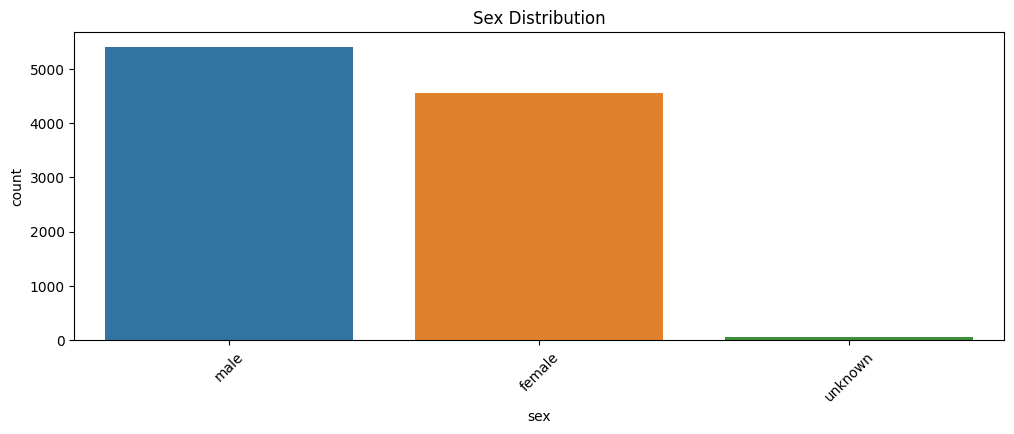

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='sex')
plt.title('Sex Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
for column in categorical_columns:
    meta_data['dx'].value_counts()

meta_data['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

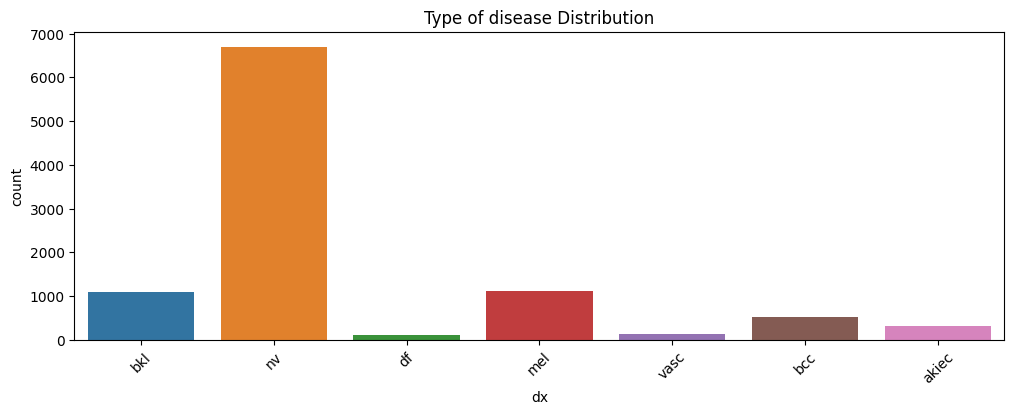

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx')
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
for column in categorical_columns:
    meta_data['dx_type'].value_counts()

meta_data['dx_type'].value_counts()

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

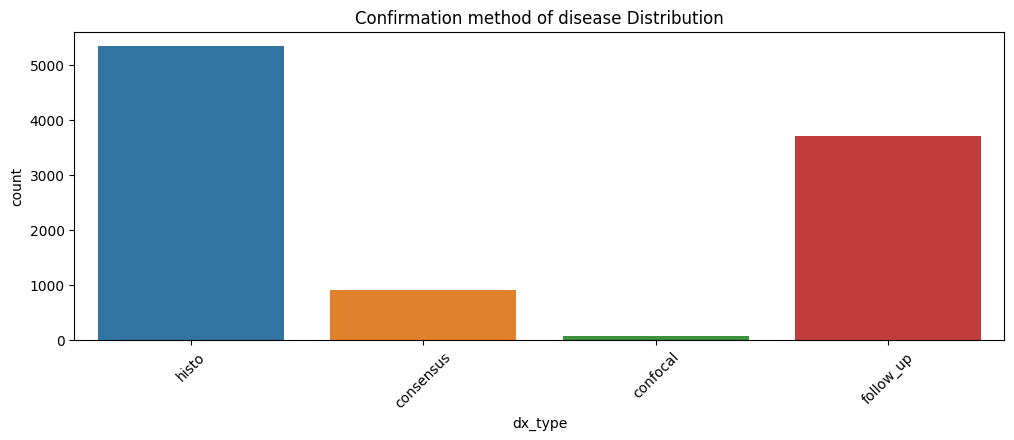

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx_type')
plt.title('Confirmation method of disease Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
for column in numerical_columns:
    print(f"\nValue counts for {column}:")
    print(meta_data[column].value_counts(dropna=False))  # Include NaN in counts


Value counts for age:
age
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
NaN       57
10.0      41
0.0       39
Name: count, dtype: int64


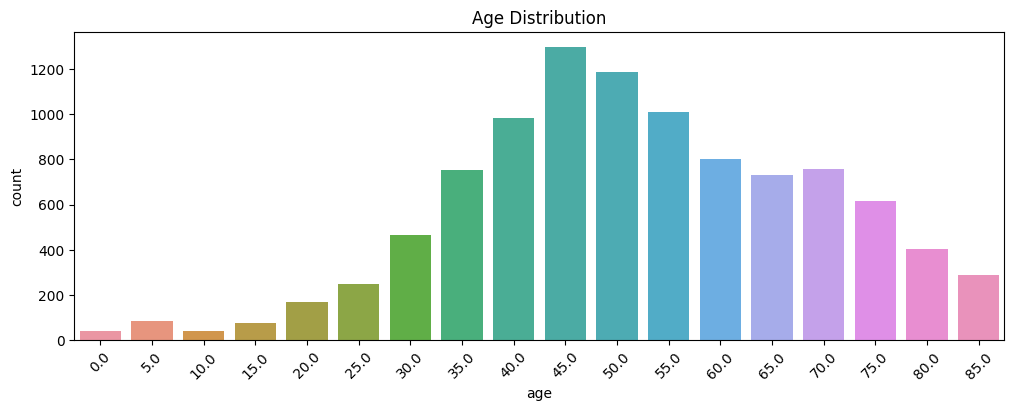

In [ ]:
# Distribution of Age in pictorial format
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

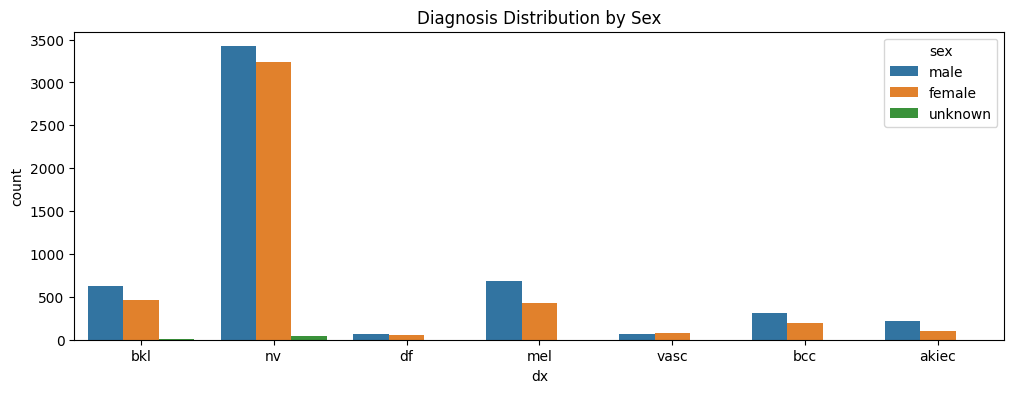

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx', hue='sex')
plt.title('Diagnosis Distribution by Sex')
plt.show()

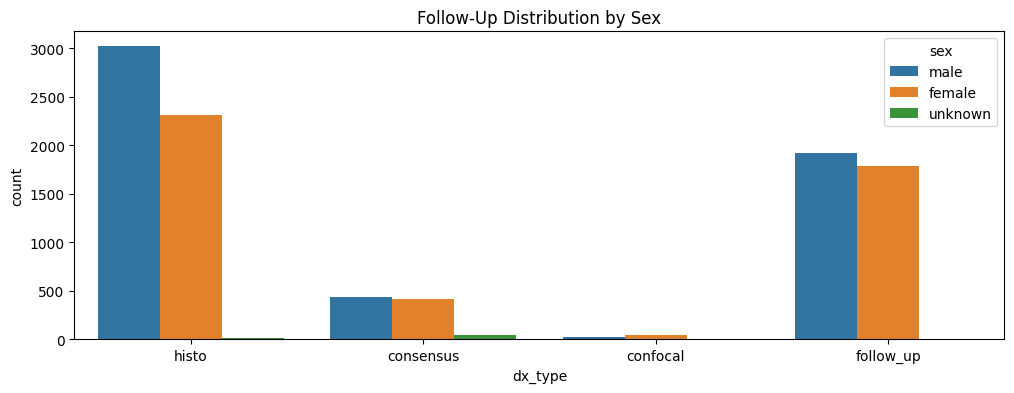

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx_type', hue='sex')
plt.title('Follow-Up Distribution by Sex')
plt.show()

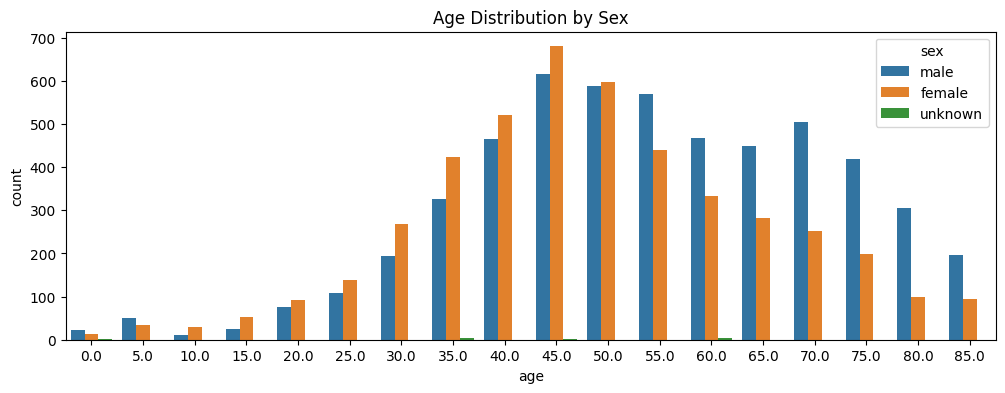

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='sex')
plt.title('Age Distribution by Sex')
plt.show()

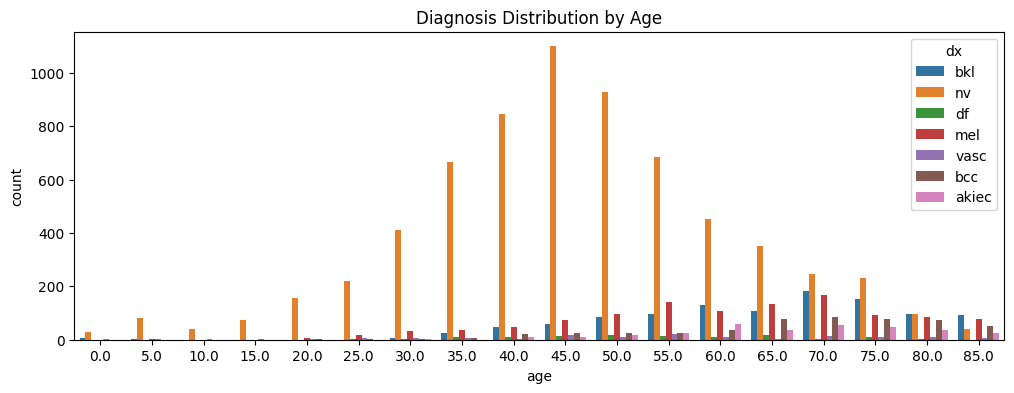

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='dx')
plt.title('Diagnosis Distribution by Age')
plt.show()

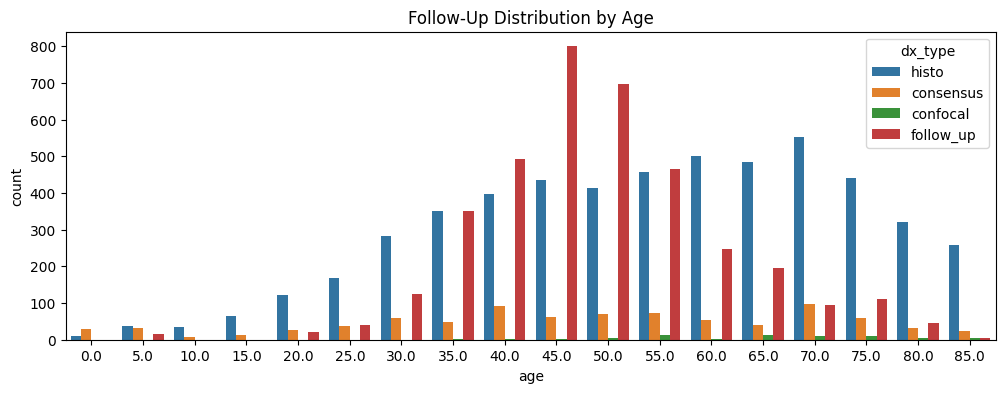

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='dx_type')
plt.title('Follow-Up Distribution by Age')
plt.show()

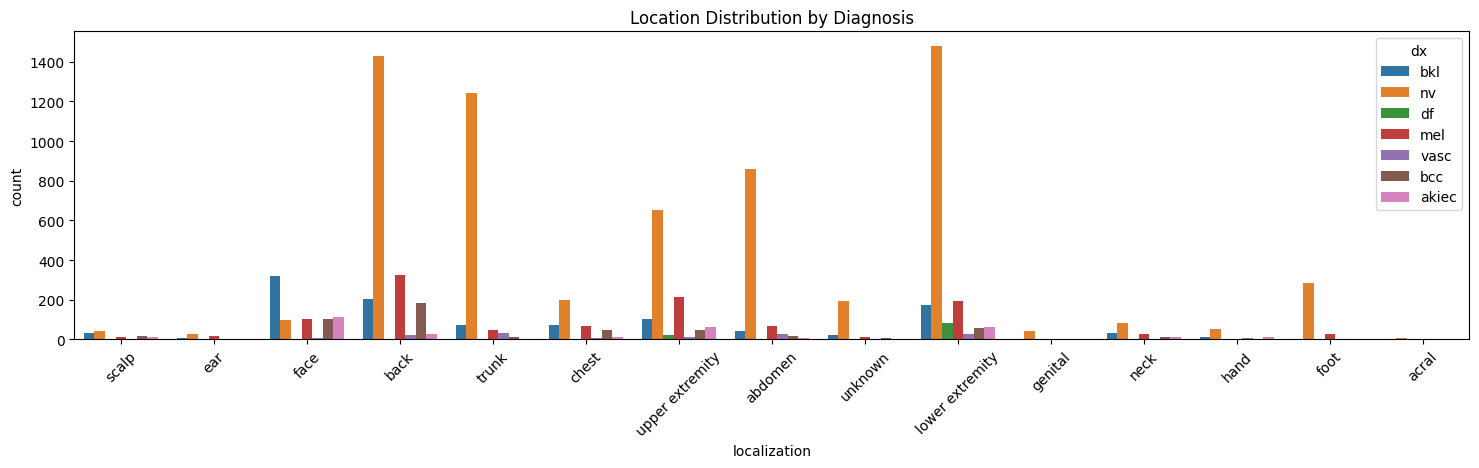

In [ ]:
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='dx')
plt.title('Location Distribution by Diagnosis')
plt.xticks(rotation=45)
plt.show()

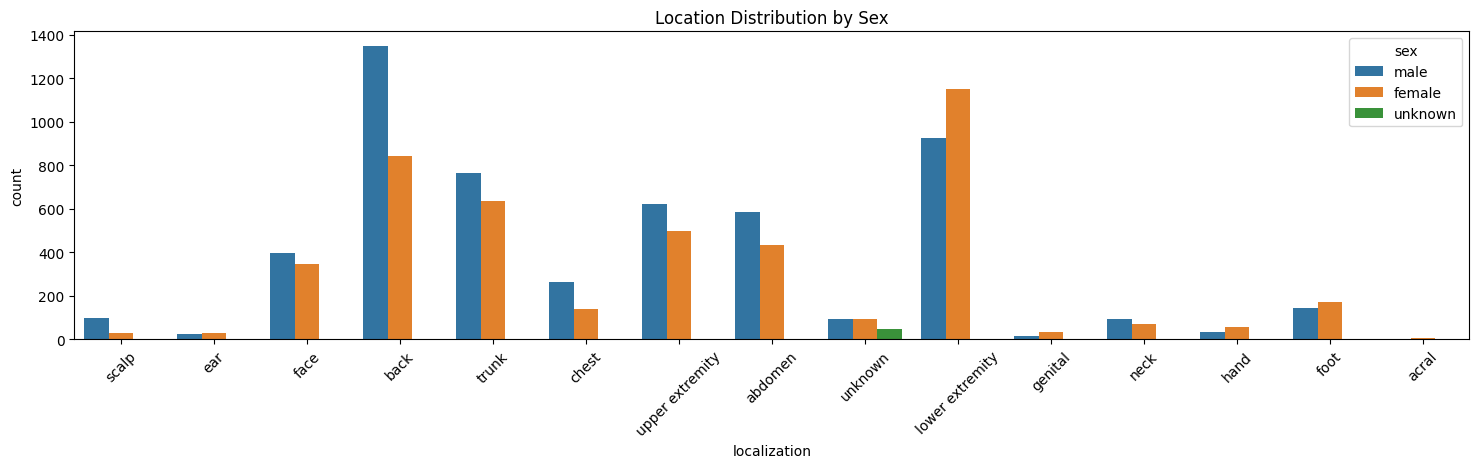

In [ ]:
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='sex')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

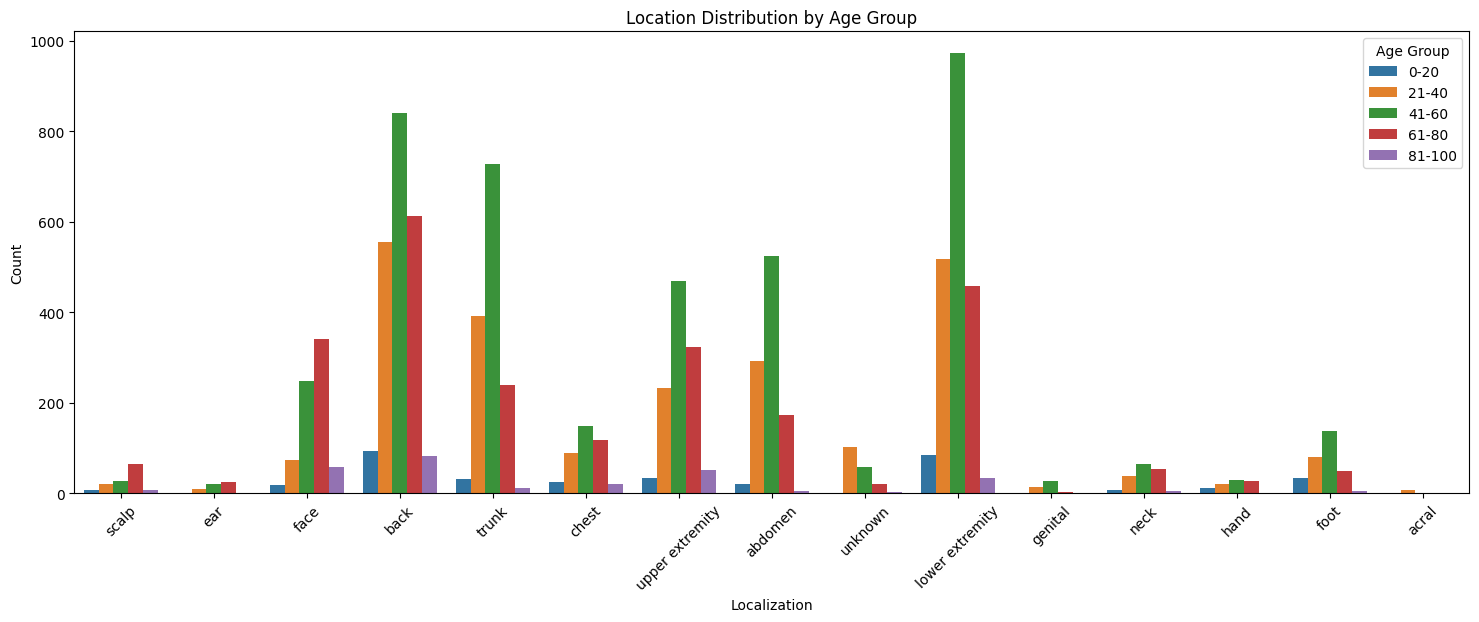

In [ ]:
age_groups = pd.cut(meta_data['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

meta_data['age_group'] = age_groups
plt.figure(figsize=(18, 6))
sns.countplot(data=meta_data, x='localization', hue='age_group')
plt.title('Location Distribution by Age Group')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

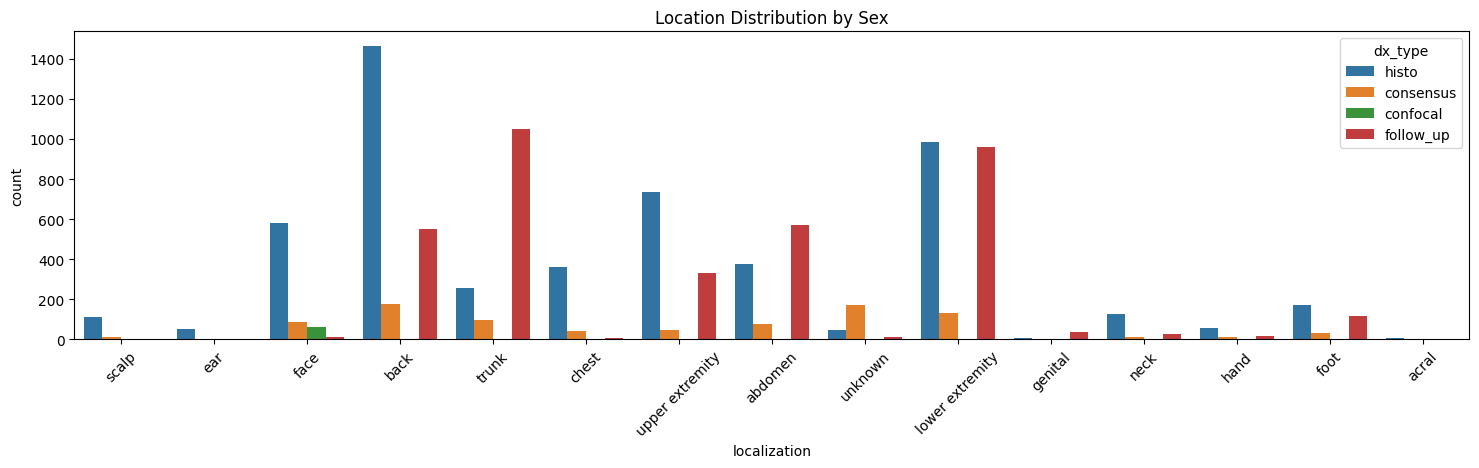

In [ ]:
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='dx_type')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

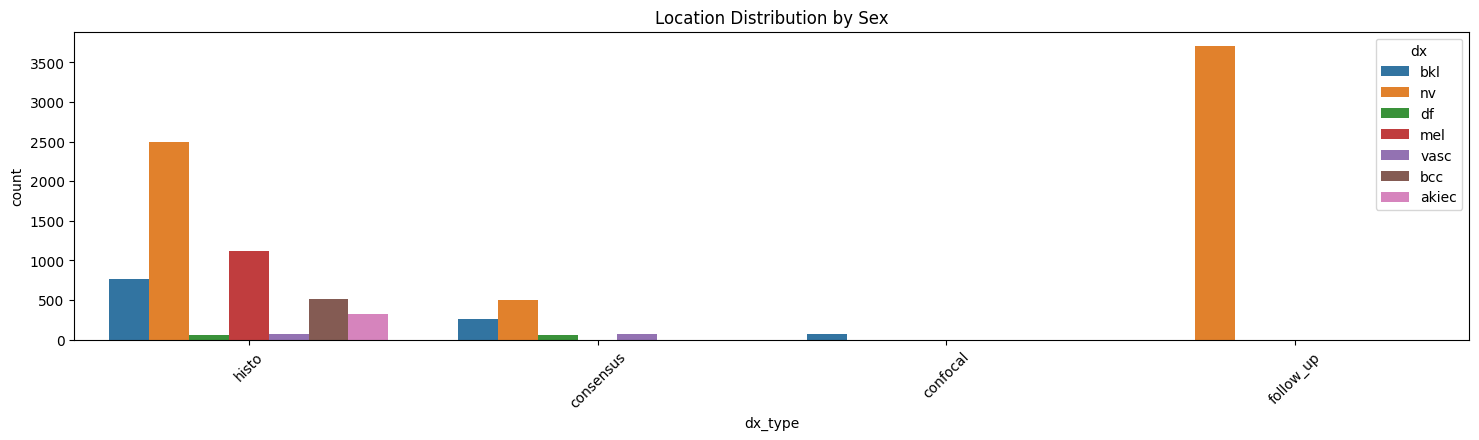

In [ ]:
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='dx_type', hue='dx')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   lesion_id     10015 non-null  object  
 1   image_id      10015 non-null  object  
 2   dx            10015 non-null  object  
 3   dx_type       10015 non-null  object  
 4   age           9958 non-null   float64 
 5   sex           10015 non-null  object  
 6   localization  10015 non-null  object  
 7   age_group     9919 non-null   category
dtypes: category(1), float64(1), object(6)
memory usage: 557.8+ KB


In [ ]:
meta_data.head()

lesion_id      image_id   dx dx_type   age   sex localization age_group
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp     61-80
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp     61-80
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp     61-80
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp     61-80
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear     61-80

In [ ]:
meta_data = meta_data.drop_duplicates()
meta_data = meta_data.drop(columns=['age_group'])

In [ ]:
from sklearn.impute import KNNImputer

columns_for_imputation = ['age']
impute_data = meta_data[columns_for_imputation]

imputer = KNNImputer(n_neighbors=5)

imputed_data = imputer.fit_transform(impute_data)

meta_data['age'] = imputed_data[:, 0]

meta_data.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
meta_data['age']

0        80.0
1        80.0
2        80.0
3        80.0
4        75.0
         ... 
10010    40.0
10011    40.0
10012    40.0
10013    80.0
10014    70.0
Name: age, Length: 10015, dtype: float64

In [ ]:
meta_data = meta_data.rename(columns={
    'lesion_id': 'Lesion_Id',
    'image_id': 'Image_Id',
    'dx': 'Diagnosis',
    'dx_type': 'Confirmation_Method',
    'age': 'Age',
    'sex': 'Sex',
    'localization': 'Region_Of_Disease'
})

In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lesion_Id            10015 non-null  object 
 1   Image_Id             10015 non-null  object 
 2   Diagnosis            10015 non-null  object 
 3   Confirmation_Method  10015 non-null  object 
 4   Age                  10015 non-null  float64
 5   Sex                  10015 non-null  object 
 6   Region_Of_Disease    10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
diagnosis_mapping = {
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis-Like Lesions',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic Nevi'
}

meta_data['Updated_Diagnosis'] = meta_data['Diagnosis'].map(diagnosis_mapping)

In [ ]:
meta_data.head()

Lesion_Id      Image_Id Diagnosis Confirmation_Method   Age   Sex  \
0  HAM_0000118  ISIC_0027419       bkl               histo  80.0  male   
1  HAM_0000118  ISIC_0025030       bkl               histo  80.0  male   
2  HAM_0002730  ISIC_0026769       bkl               histo  80.0  male   
3  HAM_0002730  ISIC_0025661       bkl               histo  80.0  male   
4  HAM_0001466  ISIC_0031633       bkl               histo  75.0  male   

  Region_Of_Disease              Updated_Diagnosis  
0             scalp  Benign Keratosis-Like Lesions  
1             scalp  Benign Keratosis-Like Lesions  
2             scalp  Benign Keratosis-Like Lesions  
3             scalp  Benign Keratosis-Like Lesions  
4               ear  Benign Keratosis-Like Lesions

In [ ]:
meta_data['Age'] = meta_data['Age'].astype(int)

In [ ]:
meta_data.head()

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age   Sex  \
0  HAM_0000118  ISIC_0027419       bkl               histo   80  male   
1  HAM_0000118  ISIC_0025030       bkl               histo   80  male   
2  HAM_0002730  ISIC_0026769       bkl               histo   80  male   
3  HAM_0002730  ISIC_0025661       bkl               histo   80  male   
4  HAM_0001466  ISIC_0031633       bkl               histo   75  male   

  Region_Of_Disease              Updated_Diagnosis  
0             scalp  Benign Keratosis-Like Lesions  
1             scalp  Benign Keratosis-Like Lesions  
2             scalp  Benign Keratosis-Like Lesions  
3             scalp  Benign Keratosis-Like Lesions  
4               ear  Benign Keratosis-Like Lesions

In [ ]:
meta_data.isna().sum()

Lesion_Id              0
Image_Id               0
Diagnosis              0
Confirmation_Method    0
Age                    0
Sex                    0
Region_Of_Disease      0
Updated_Diagnosis      0
dtype: int64

In [ ]:
image_path1='drive/Skin-cancer'
image_path2='drive/Skin-cancer'

In [ ]:
final_image_dataset = 'drive/Skin-cancer'

In [ ]:
import os
import shutil
if not os.path.exists(final_image_dataset):
    os.makedirs(final_image_dataset)

for filename in os.listdir(image_path1):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        shutil.copy(os.path.join(image_path1, filename), final_image_dataset)

for filename in os.listdir(image_path2):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        shutil.copy(os.path.join(image_path2, filename), final_image_dataset)

In [ ]:
meta_data['Image_path'] = meta_data['Image_Id'].apply(lambda x: os.path.join(final_image_dataset, f"{x}.jpg"))

In [ ]:
meta_data

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age     Sex  \
0      HAM_0000118  ISIC_0027419       bkl               histo   80    male   
1      HAM_0000118  ISIC_0025030       bkl               histo   80    male   
2      HAM_0002730  ISIC_0026769       bkl               histo   80    male   
3      HAM_0002730  ISIC_0025661       bkl               histo   80    male   
4      HAM_0001466  ISIC_0031633       bkl               histo   75    male   
...            ...           ...       ...                 ...  ...     ...   
10010  HAM_0002867  ISIC_0033084     akiec               histo   40    male   
10011  HAM_0002867  ISIC_0033550     akiec               histo   40    male   
10012  HAM_0002867  ISIC_0033536     akiec               histo   40    male   
10013  HAM_0000239  ISIC_0032854     akiec               histo   80    male   
10014  HAM_0003521  ISIC_0032258       mel               histo   70  female   

      Region_Of_Disease              Updated_Diagnosis  \
0                 scalp  Benign Keratosis-Like Lesions   
1                 scalp  Benign Keratosis-Like Lesions   
2                 scalp  Benign Keratosis-Like Lesions   
3                 scalp  Benign Keratosis-Like Lesions   
4                   ear  Benign Keratosis-Like Lesions   
...                 ...                            ...   
10010           abdomen              Actinic Keratoses   
10011           abdomen              Actinic Keratoses   
10012           abdomen              Actinic Keratoses   
10013              face              Actinic Keratoses   
10014              back                       Melanoma   

                                              Image_path  
0      /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
1      /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
2      /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
3      /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
4      /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
...                                                  ...  
10010  /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
10011  /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
10012  /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
10013  /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
10014  /kaggle/working/skin-cancer-mnist-ham10000/ISI...  

[10015 rows x 9 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
meta_data['Updated_Diagnosis_Label'] = label_encoder.fit_transform(meta_data['Updated_Diagnosis'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'Actinic Keratoses': 0, 'Basal Cell Carcinoma': 1, 'Benign Keratosis-Like Lesions': 2, 'Dermatofibroma': 3, 'Melanocytic Nevi': 4, 'Melanoma': 5, 'Vascular Lesions': 6}


In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Lesion_Id                10015 non-null  object
 1   Image_Id                 10015 non-null  object
 2   Diagnosis                10015 non-null  object
 3   Confirmation_Method      10015 non-null  object
 4   Age                      10015 non-null  int64 
 5   Sex                      10015 non-null  object
 6   Region_Of_Disease        10015 non-null  object
 7   Updated_Diagnosis        10015 non-null  object
 8   Image_path               10015 non-null  object
 9   Updated_Diagnosis_Label  10015 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 782.5+ KB


In [ ]:
meta_data.head()

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age   Sex  \
0  HAM_0000118  ISIC_0027419       bkl               histo   80  male   
1  HAM_0000118  ISIC_0025030       bkl               histo   80  male   
2  HAM_0002730  ISIC_0026769       bkl               histo   80  male   
3  HAM_0002730  ISIC_0025661       bkl               histo   80  male   
4  HAM_0001466  ISIC_0031633       bkl               histo   75  male   

  Region_Of_Disease              Updated_Diagnosis  \
0             scalp  Benign Keratosis-Like Lesions   
1             scalp  Benign Keratosis-Like Lesions   
2             scalp  Benign Keratosis-Like Lesions   
3             scalp  Benign Keratosis-Like Lesions   
4               ear  Benign Keratosis-Like Lesions   

                                          Image_path  Updated_Diagnosis_Label  
0  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        2  
1  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        2  
2  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        2  
3  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        2  
4  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        2

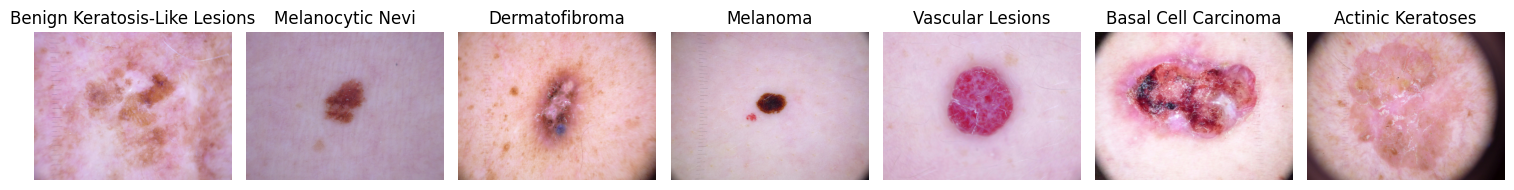

In [ ]:
for i in range(len(meta_data)):
    if not os.path.isfile(meta_data['Image_path'].iloc[i]):
        raise FileNotFoundError(f"Image file not found: {meta_data['Image_path'].iloc[i]}")

class_images = meta_data.drop_duplicates(subset='Updated_Diagnosis')

def plot_class_images(class_images):
    plt.figure(figsize=(15, 5))
    num_classes = len(class_images)
    for i in range(num_classes):
        plt.subplot(1, num_classes, i + 1)
        img = plt.imread(class_images['Image_path'].iloc[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_images['Updated_Diagnosis'].iloc[i], fontsize=12)
    plt.tight_layout()
    plt.show()

plot_class_images(class_images)

In [ ]:
meta_data['Updated_Diagnosis'].unique()

array(['Benign Keratosis-Like Lesions', 'Melanocytic Nevi',
       'Dermatofibroma', 'Melanoma', 'Vascular Lesions',
       'Basal Cell Carcinoma', 'Actinic Keratoses'], dtype=object)

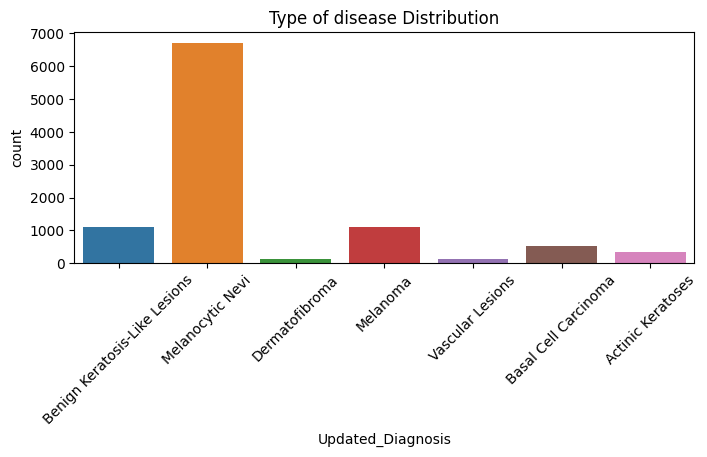

In [ ]:
plt.figure(figsize=(8, 3))
sns.countplot(data=meta_data, x='Updated_Diagnosis')
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pip install imgaug opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import imgaug.augmenters as iaa
from sklearn.model_selection import train_test_split
from skimage import io

In [ ]:
import os
import pandas as pd
from skimage import io
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapsOnImage

aug_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.Affine(rotate=(-10, 10)),
    iaa.Affine(scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}),
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(shear=(-5, 5)),
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.AdditiveGaussianNoise(scale=(0, 0.01*255)),
    iaa.LinearContrast((0.9, 1.1)),
    iaa.Resize({"height": "keep-aspect-ratio", "width": 256})
])

augmented_images_dir = '/path/to/augmented_images'
os.makedirs(augmented_images_dir, exist_ok=True)

class_counts = meta_data['Diagnosis'].value_counts()
max_count = class_counts.max()
balanced_samples = []

for label in class_counts.index:
    class_subset = meta_data[meta_data['Diagnosis'] == label]

    if len(class_subset) < max_count:
        n_augmentations = max_count - len(class_subset)
        augmented_samples = []
        for i in range(n_augmentations):
            sample = class_subset.sample(n=1, random_state=42).iloc[0]
            img_path = sample['Image_path']
            img = io.imread(img_path)
            augmented_image = aug_pipeline(image=img)


            augmented_image_path = os.path.join(augmented_images_dir, f'{label}_augmented_{i}.jpg')
            io.imsave(augmented_image_path, augmented_image)


            augmented_sample = sample.copy()
            augmented_sample['Image_path'] = augmented_image_path
            augmented_samples.append(augmented_sample)

        augmented_df = pd.DataFrame(augmented_samples)
        class_oversampled = pd.concat([class_subset, augmented_df], ignore_index=True)
    else:
        class_oversampled = class_subset

    balanced_samples.append(class_oversampled)

balanced_dataset = pd.concat(balanced_samples).reset_index(drop=True)

print("Dataset balanced successfully!")

Dataset balanced successfully!


In [ ]:
meta_data = balanced_dataset
meta_data.head()

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age     Sex  \
0  HAM_0001751  ISIC_0024698        nv           consensus   70    male   
1  HAM_0000559  ISIC_0024693        nv           follow_up   45  female   
2  HAM_0004932  ISIC_0032212        nv           follow_up   45  female   
3  HAM_0004516  ISIC_0025775        nv           follow_up   45  female   
4  HAM_0006510  ISIC_0029828        nv           follow_up   55  female   

  Region_Of_Disease Updated_Diagnosis  \
0              face  Melanocytic Nevi   
1   upper extremity  Melanocytic Nevi   
2              foot  Melanocytic Nevi   
3              neck  Melanocytic Nevi   
4   lower extremity  Melanocytic Nevi   

                                          Image_path  Updated_Diagnosis_Label  
0  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4  
1  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4  
2  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4  
3  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4  
4  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4

In [ ]:
meta_data['Updated_Diagnosis'].unique()

array(['Melanocytic Nevi', 'Melanoma', 'Benign Keratosis-Like Lesions',
       'Basal Cell Carcinoma', 'Actinic Keratoses', 'Vascular Lesions',
       'Dermatofibroma'], dtype=object)

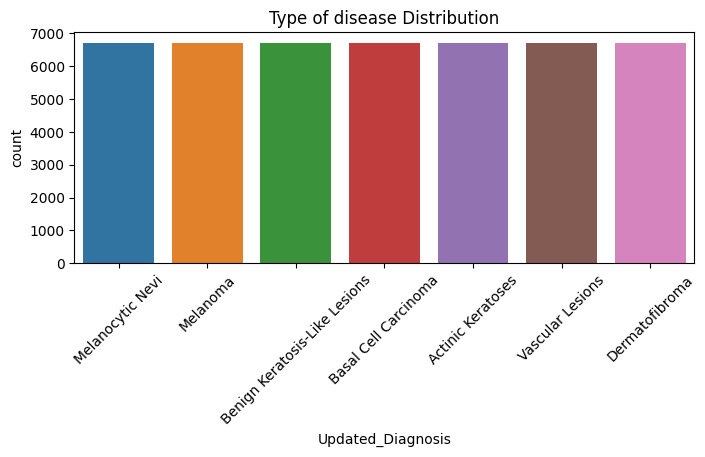

In [ ]:
plt.figure(figsize=(8, 3))
sns.countplot(data=meta_data, x='Updated_Diagnosis')
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.show()

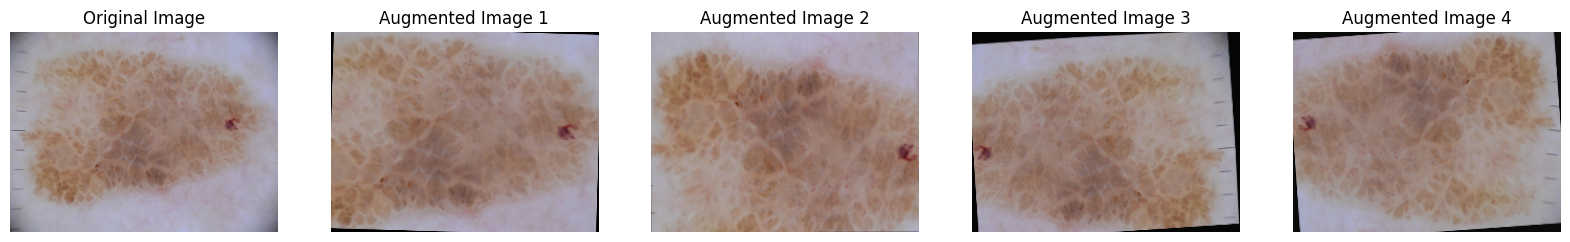

In [ ]:
import imgaug.augmenters as iaa
import imageio
image = imageio.imread('drive/Skin-cancer/ISIC_0024471.jpg')

mean_pixel_value = int(np.mean(image))

aug_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.Affine(rotate=(-10, 10)),
    iaa.Affine(scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}),
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(shear=(-5, 5)),
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.AdditiveGaussianNoise(scale=(0, 0.01*255)),
    iaa.LinearContrast((0.9, 1.1)),
    iaa.Resize({"height": "keep-aspect-ratio", "width": 256})
])

augmented_images = [aug_pipeline(image=image) for _ in range(4)]

fig, axes = plt.subplots(1, 5, figsize=(20, 10))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, aug_img in enumerate(augmented_images):
    axes[i+1].imshow(aug_img)
    axes[i+1].set_title(f'Augmented Image {i+1}')
    axes[i+1].axis('off')

plt.show()

In [ ]:
X = meta_data.drop(columns=['Updated_Diagnosis_Label'])
y = meta_data['Updated_Diagnosis_Label']

print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (46935, 9)
Shape of target variable (y): (46935,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.8, 1.2],
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)

Found 37548 validated image filenames belonging to 7 classes.
Found 4693 validated image filenames belonging to 7 classes.
Found 4694 validated image filenames belonging to 7 classes.


# DenseNet201

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

base_model =DenseNet201(weights='imagenet',include_top=False, input_shape=(224, 224, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

predictions = Dense(7, activation='softmax')(x)

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adamax

model.compile(loss='categorical_crossentropy',
              optimizer=Adamax(),
            metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
checkpoint = ModelCheckpoint(filepath='model_weights.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
class_counts = meta_data['Updated_Diagnosis_Label'].value_counts().to_dict()
total_samples = sum(class_counts.values())
class_weights = {i: total_samples/count for i, count in enumerate(class_counts.values())}

print("Class weights:", class_weights)

Class weights: {0: 7.0, 1: 7.0, 2: 7.0, 3: 7.0, 4: 7.0, 5: 7.0, 6: 7.0}


In [ ]:
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
history=model.fit(
    train_generator,
    epochs=10,
    batch_size=32,
    validation_data=val_generator,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/10


I0000 00:00:1728607663.507641      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1728607663.640136      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/376 ━━━━━━━━━━━━━━━━━━━━ 8:26 2s/step - accuracy: 0.7521 - loss: 2.3943

W0000 00:00:1728607914.228069      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8407 - loss: 1.7293

W0000 00:00:1728608333.635176      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1728608410.067436      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


376/376 ━━━━━━━━━━━━━━━━━━━━ 849s 2s/step - accuracy: 0.8408 - loss: 1.7280 - val_accuracy: 0.9382 - val_loss: 0.8322 - learning_rate: 0.0010
Epoch 2/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 642s 2s/step - accuracy: 0.9288 - loss: 0.7627 - val_accuracy: 0.9388 - val_loss: 0.5871 - learning_rate: 0.0010
Epoch 3/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 646s 2s/step - accuracy: 0.9363 - loss: 0.5469 - val_accuracy: 0.9403 - val_loss: 0.4494 - learning_rate: 0.0010
Epoch 4/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 647s 2s/step - accuracy: 0.9371 - loss: 0.4234 - val_accuracy: 0.9437 - val_loss: 0.3540 - learning_rate: 0.0010
Epoch 5/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 643s 2s/step - accuracy: 0.9410 - loss: 0.3411 - val_accuracy: 0.9303 - val_loss: 0.3532 - learning_rate: 0.0010
Epoch 6/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 652s 2s/step - accuracy: 0.9389 - loss: 0.3027 - val_accuracy: 0.9363 - val_loss: 0.2901 - learning_rate: 0.0010
Epoch 7/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 643s 2s/step - accuracy: 0.9434 - loss: 0.2653 - val_

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.9490 - loss: 0.2053

W0000 00:00:1728614273.660071      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9489 - loss: 0.2054
Test Accuracy: 0.95


In [ ]:
loss, accuracy = model.evaluate(train_generator)
print(f"Train Accuracy: {accuracy:.2f}")

376/376 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - accuracy: 0.9508 - loss: 0.1912
Train Accuracy: 0.95


W0000 00:00:1728614897.539163      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.2f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 361ms/step - accuracy: 0.9434 - loss: 0.2075
Validation Accuracy: 0.94


In [ ]:
model.save('Bonolo_Skin_disease_DenseNetmodel.h5')

## Load the Model

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('Bonolo_Skin_disease_DenseNetmodel.h5')

In [ ]:
sample_meta=pd.read_csv('drive/Skin-cancer/Skin.csv')
sample_meta

Image_Id Diagnosis Confirmation_Method  Age   Sex Region_Of_Disease
0  ISIC_10027419       mel            confocal   60  male              back
1  ISIC_20025030     akiec           consensus   50  male             scalp
2  ISIC_30026769       bcc               histo   80  male             trunk
3  ISIC_40025661        df           follow_up   20  male             scalp
4  ISIC_50031633        nv               histo   75  male           abdomen
5  ISIC_60027850      vasc           consensus   75  male               ear
6  ISIC_70029176       bkl               histo   55  male              face

In [ ]:
sample_final_dataset='drive/Skin-cancer'

In [ ]:
sample_meta['Image_path'] = sample_meta['Image_Id'].apply(lambda x: os.path.join(sample_final_dataset, f"{x}.jpg"))
sample_meta

In [ ]:
sample_meta.columns

Index(['Image_Id', 'Diagnosis', 'Confirmation_Method', 'Age', 'Sex',
       'Region_Of_Disease', 'Image_path'],
      dtype='object')

In [ ]:
sample_meta['Image_path']

## External Images

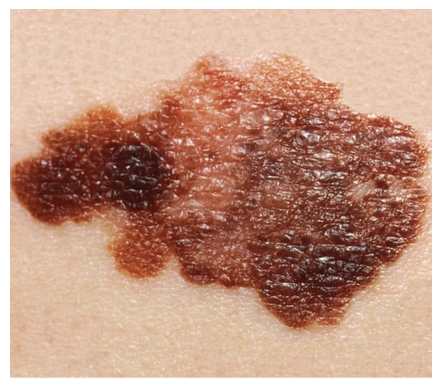

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Melanoma
image_path = 'drive/Skin-cancer/ISIC_10027419.jpg'
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.densenet import preprocess_input  # Ensure the correct preprocessing function is used

def preprocess_image(image_path, target_size=(224, 224)):

    image = load_img(image_path, target_size=target_size)

    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)
    return image_array

def predict_skin_disease(model, image_path, class_labels):
    image_array = preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

class_labels = ['Actinic Keratoses', 'Basal Cell Carcinoma',
                'Benign Keratosis-Like Lesions', 'Dermatofibroma',
                'Melanocytic Nevi', 'Melanoma', 'Vascular Lesions']

image_path = 'drive/Skin-cancer/ISIC_10027419.jpg'

model = load_model('Bonolo_Skin_disease_DenseNetmodel.h5')

predicted_class_label = predict_skin_disease(model, image_path, class_labels)
print(f"Predicted Skin Disease Type: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
Predicted Skin Disease Type: Melanoma


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_squared_error

predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
accuracy = accuracy_score(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()), output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
auc = roc_auc_score(tf.keras.utils.to_categorical(true_classes), predictions, multi_class='ovr')
mse = mean_squared_error(true_classes, predicted_classes)
bias = (np.mean(predicted_classes) - np.mean(true_classes)) ** 2
variance = np.var(predicted_classes)


print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

 1/47 ━━━━━━━━━━━━━━━━━━━━ 12:58 17s/step

W0000 00:00:1728615112.933406      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 693ms/step


W0000 00:00:1728615144.797276      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Accuracy: 0.95
Sensitivity: 1.00
Specificity: 0.99
Precision: 0.95
F1-Score: 0.95
AUC: 1.00
Mean Squared Error: 0.27


47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 345ms/step


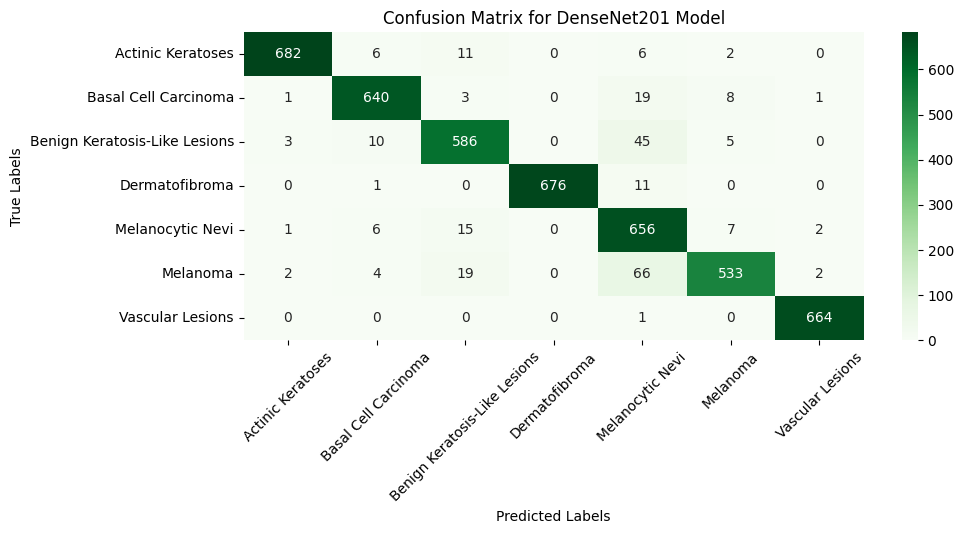

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for DenseNet201 Model')
plt.xticks(rotation=45)
plt.show()

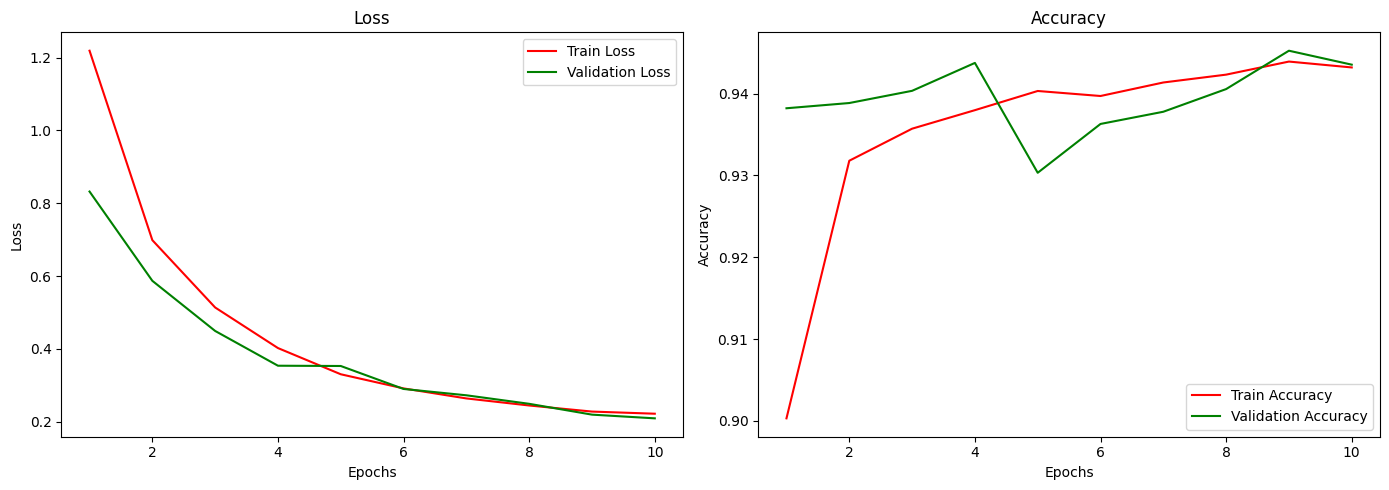

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(tr_acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

     Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age     Sex  \
0  HAM_0001751  ISIC_0024698        nv           consensus   70    male   
1  HAM_0000559  ISIC_0024693        nv           follow_up   45  female   
2  HAM_0004932  ISIC_0032212        nv           follow_up   45  female   
3  HAM_0004516  ISIC_0025775        nv           follow_up   45  female   
4  HAM_0006510  ISIC_0029828        nv           follow_up   55  female   

  Region_Of_Disease Updated_Diagnosis  \
0              face  Melanocytic Nevi   
1   upper extremity  Melanocytic Nevi   
2              foot  Melanocytic Nevi   
3              neck  Melanocytic Nevi   
4   lower extremity  Melanocytic Nevi   

                                          Image_path  Updated_Diagnosis_Label  
0  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4  
1  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4  
2  /kaggle/working/skin-cancer-mnist-ham10000/ISI...          

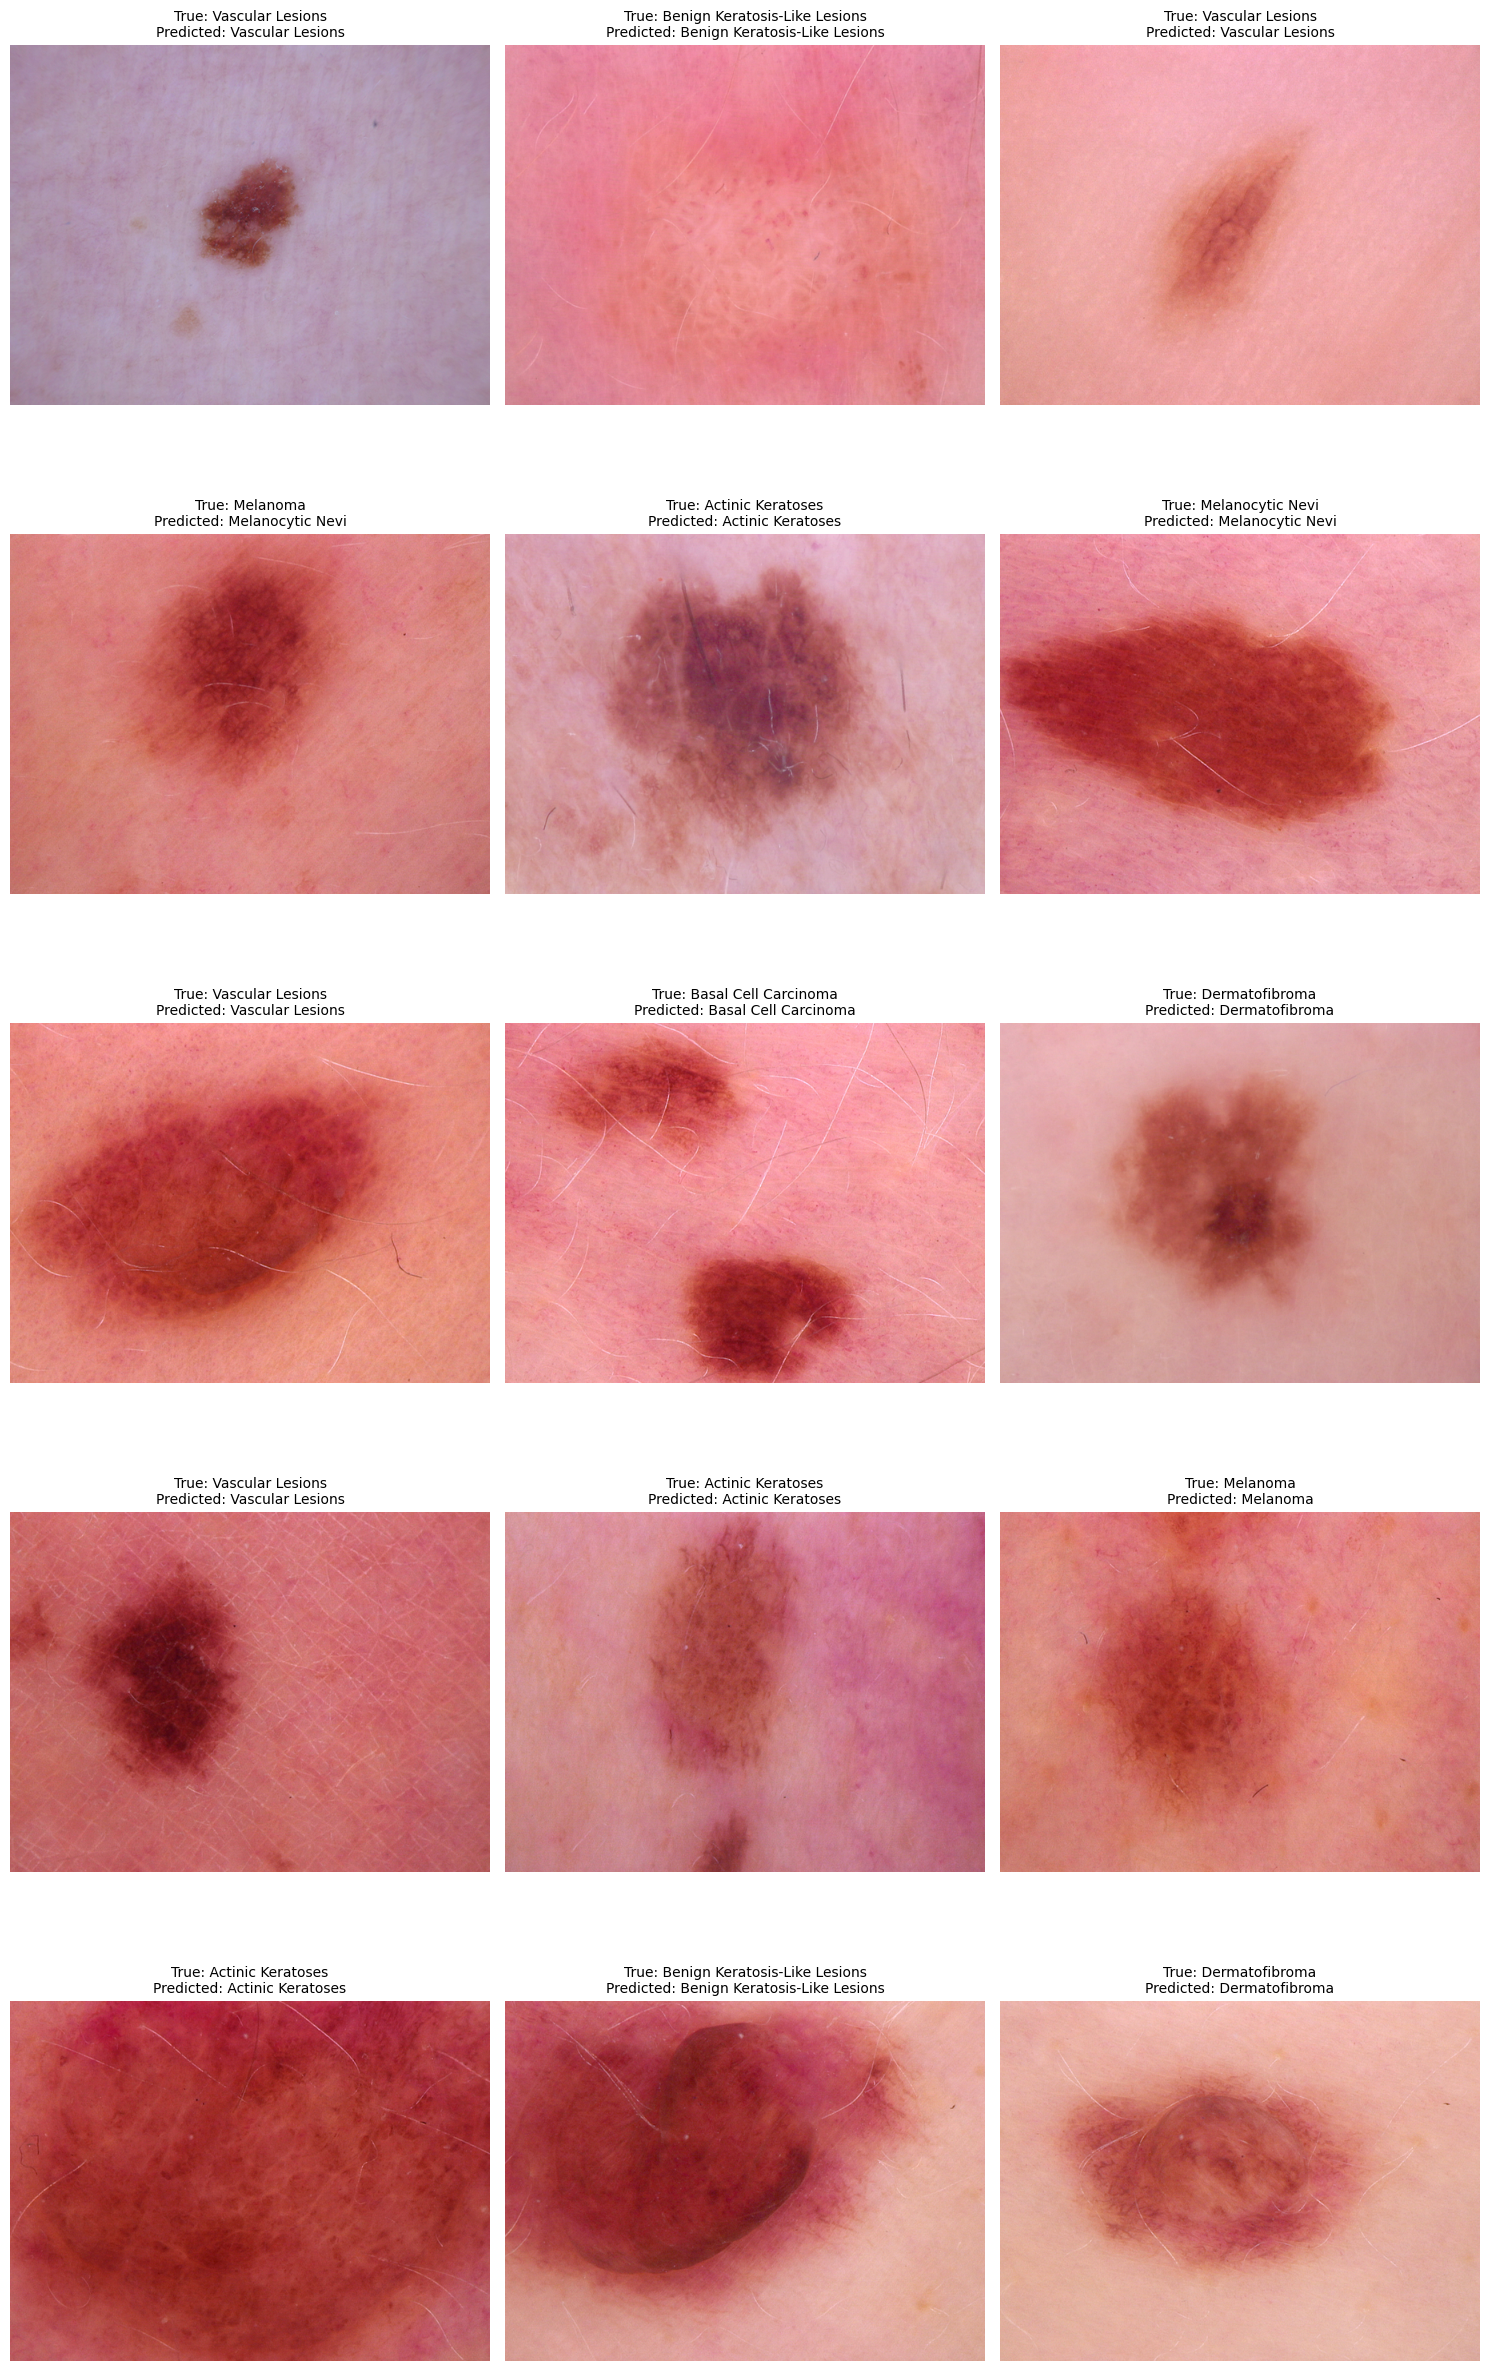

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(meta_data.head())

true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

class_labels = list(test_generator.class_indices.keys())

print(f"Length of true_labels: {len(true_labels)}")
print(f"Length of predicted_labels: {len(predicted_labels)}")
print(f"Length of meta_data: {len(meta_data)}")

if len(true_labels) > len(meta_data):
    raise ValueError("The number of true labels exceeds the number of rows in the meta_data DataFrame.")

meta_data = meta_data.iloc[:len(true_labels)]

meta_data['true_label'] = [class_labels[true_labels[i]] for i in range(len(true_labels))]
meta_data['predicted_label'] = [class_labels[predicted_labels[i]] for i in range(len(predicted_labels))]

plt.figure(figsize=(15, 25))
for i in range(15):
    plt.subplot(5, 3, i + 1)
    img = plt.imread(meta_data['Image_path'].iloc[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {meta_data['true_label'].iloc[i]}\nPredicted: {meta_data['predicted_label'].iloc[i]}", fontsize=10)

plt.tight_layout()
plt.show()
